# Time Series Models

## Importing Necessary Libraries

In [1]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

#For date-time
from datetime import datetime
from datetime import timedelta
import math

from statsmodels.tsa.stattools import adfuller

from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose

import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

from statsmodels.tsa.holtwinters import ExponentialSmoothing

from pandas.plotting import autocorrelation_plot as auto_corr
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose as season
from statsmodels.tsa.arima_model import ARIMA
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from arch import arch_model
from arch.univariate import ARX, GARCH, StudentsT, Normal

import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn import preprocessing

In [2]:
pd.options.display.max_columns=100 # to see columns 

In [3]:
df = pd.read_csv('clean_data.csv')

In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True) #dropping default column

In [11]:
df.head() # to see my data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010


In [5]:
df["Date"] = pd.to_datetime(df["Date"]) #changing data to datetime for decomposing

In [6]:
df.set_index('Date', inplace=True) #seting date as index

# Plotting Sales

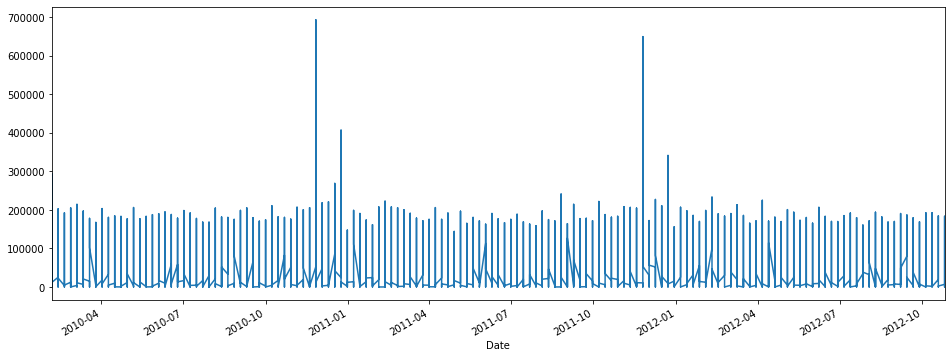

In [14]:
plt.figure(figsize=(16,6))
df['Weekly_Sales'].plot()
plt.show()

In this data, there are lots of same data values. So, I will collect them together as weekly.

In [7]:
df_week = df.resample('W').mean() #resample data as weekly

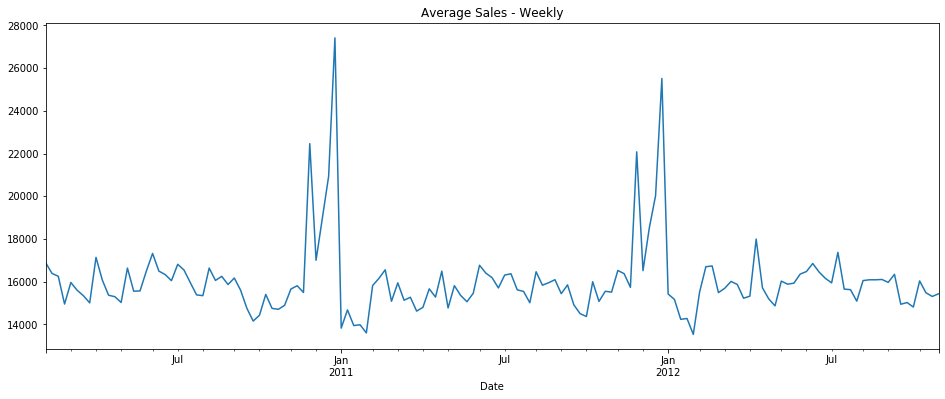

In [16]:
plt.figure(figsize=(16,6))
df_week['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

With the collecting data as weekly, I can see average sales clearly. To see monthly pattern , I resampled my data to monthly also.

In [17]:
df_month = df.resample('MS').mean() # resampling as monthly

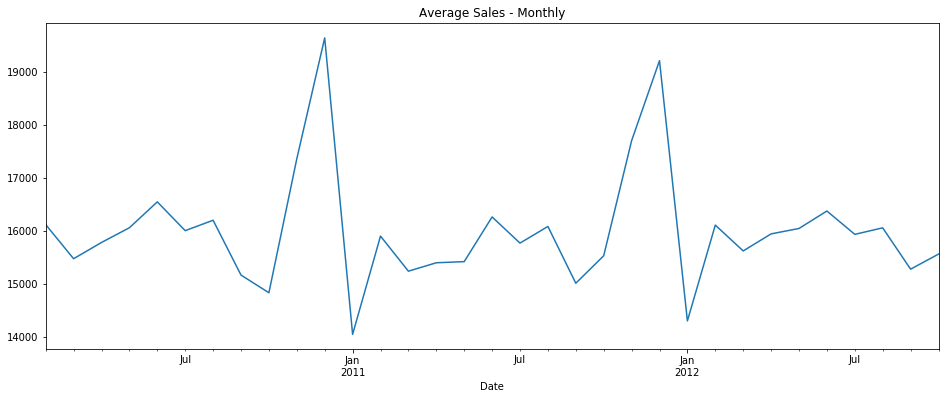

In [18]:
plt.figure(figsize=(16,6))
df_month['Weekly_Sales'].plot()
plt.title('Average Sales - Monthly')
plt.show()

When I turned data to monthly, I realized that I lost some patterns in weekly data. So, I will continue with weekly resampled data.

# To Observe 2-weeks Rolling Mean and Std

My data is non-stationary. So, I will try to find more stationary version on it. 

In [19]:
# finding 2-weeks rolling mean and std
roll_mean = df_week['Weekly_Sales'].rolling(window=2, center=False).mean()
roll_std = df_week['Weekly_Sales'].rolling(window=2, center=False).std()

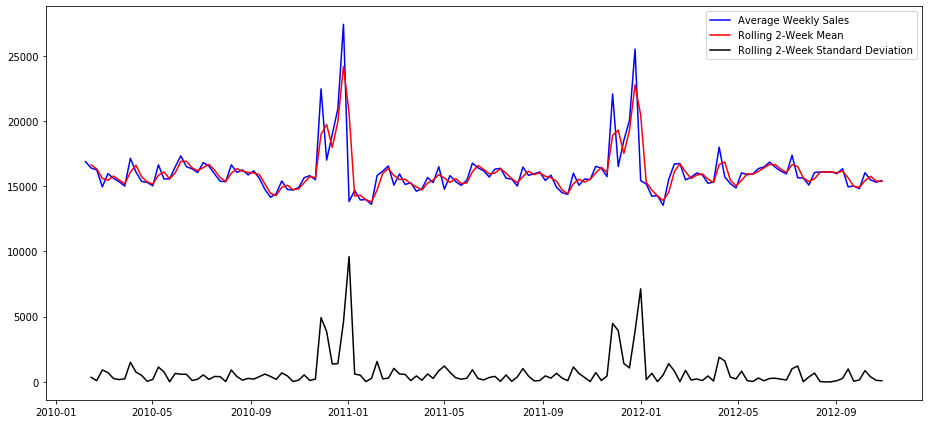

In [20]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week['Weekly_Sales'], color='blue',label='Average Weekly Sales')
ax.plot(roll_mean, color='red', label='Rolling 2-Week Mean')
ax.plot(roll_std, color='black', label='Rolling 2-Week Standard Deviation')
ax.legend()
fig.tight_layout()

# Adfuller Test to Make Sure

In [21]:
adfuller(df_week['Weekly_Sales'])

(-5.9271072237375595,
 2.4290492082043753e-07,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 2261.596421168073)

From test and my observations my data is not stationary. So, I will try to find more stationary version of it.

# Train - Test Split of Weekly Data

To take train-test splits continuosly, I split them manually, not random.

In [8]:
train_data = df_week[:int(0.7*(len(df_week)))] 
test_data = df_week[int(0.7*(len(df_week))):]

print('Train:', train_data.shape)
print('Test:', test_data.shape)

Train: (100, 21)
Test: (43, 21)


In [9]:
target = "Weekly_Sales"
used_cols = [c for c in df_week.columns.to_list() if c not in [target]] # all columns except price

# assigning train-test X-y values

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

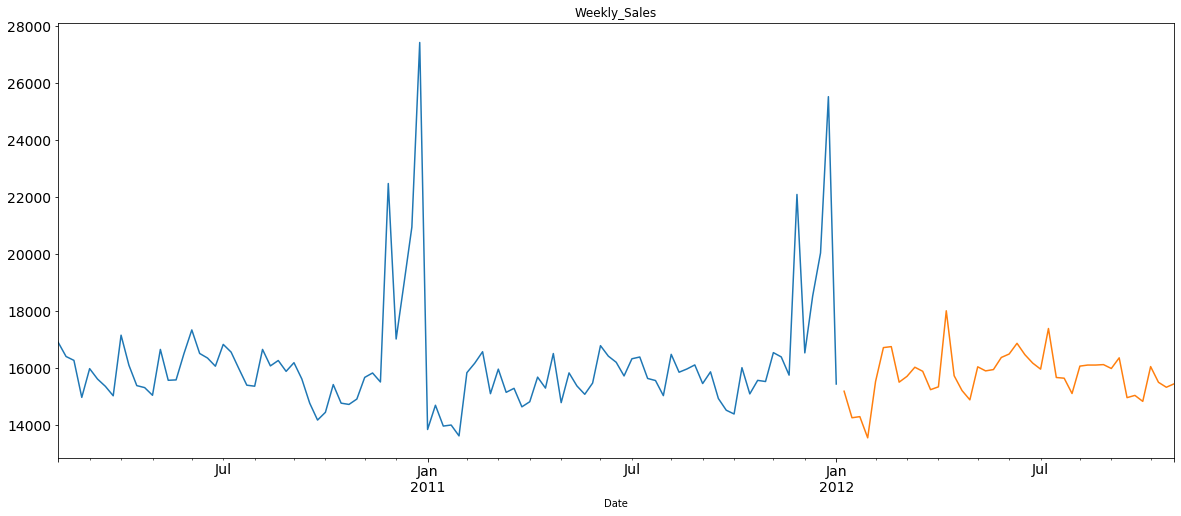

In [24]:
train_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

Blue line represents my train data, yellow is test data.

# Decomposing Weekly Data to Observe Seasonality

In [ ]:
decomposed = decompose(df_week['Weekly_Sales'].values, 'additive', m=20) #decomposing of weekly data 

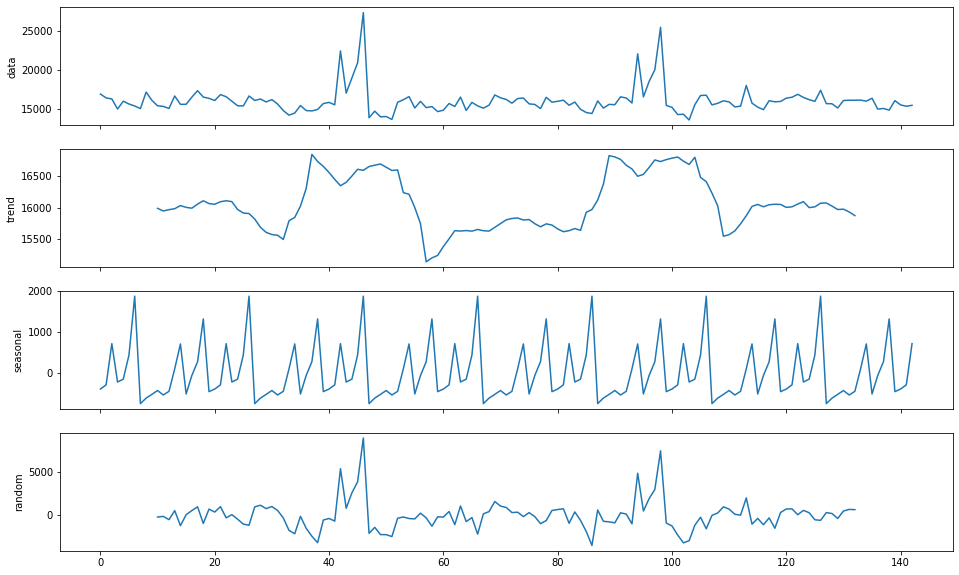

In [26]:
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()

From the graphs above, every 20 step seasonality converges to beginning point. This helps me to tune my model.

# Trying To Make Data More Stationary

Now, I will try to make my data more stationary. To do this, I will try model with differenced, logged and shifted data.

## 1. Difference

In [10]:
df_week_diff = df_week['Weekly_Sales'].diff().dropna() #creating difference values

In [28]:
# taking mean and std of differenced data
diff_roll_mean = df_week_diff.rolling(window=2, center=False).mean()
diff_roll_std = df_week_diff.rolling(window=2, center=False).std()

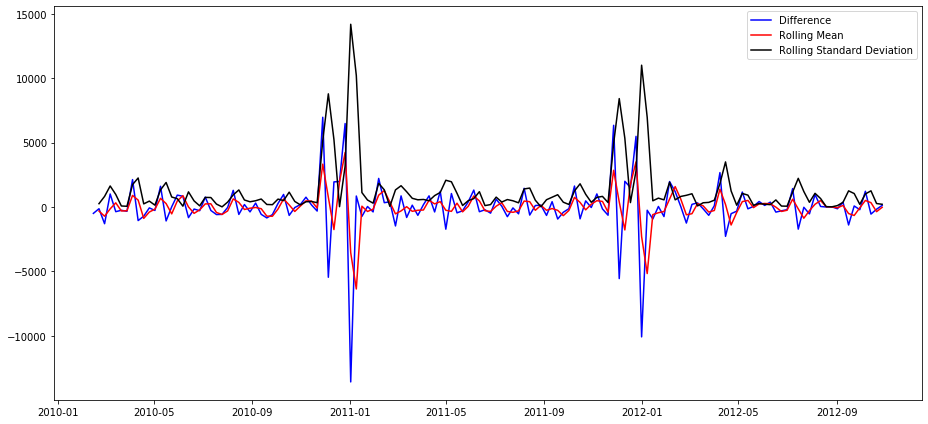

In [29]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_diff, color='blue',label='Difference')
ax.plot(diff_roll_mean, color='red', label='Rolling Mean')
ax.plot(diff_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

## 2.Shift

In [77]:
df_week_lag = df_week['Weekly_Sales'].shift().dropna() #shifting the data 

In [78]:
lag_roll_mean = df_week_lag.rolling(window=2, center=False).mean() 
lag_roll_std = df_week_lag.rolling(window=2, center=False).std()

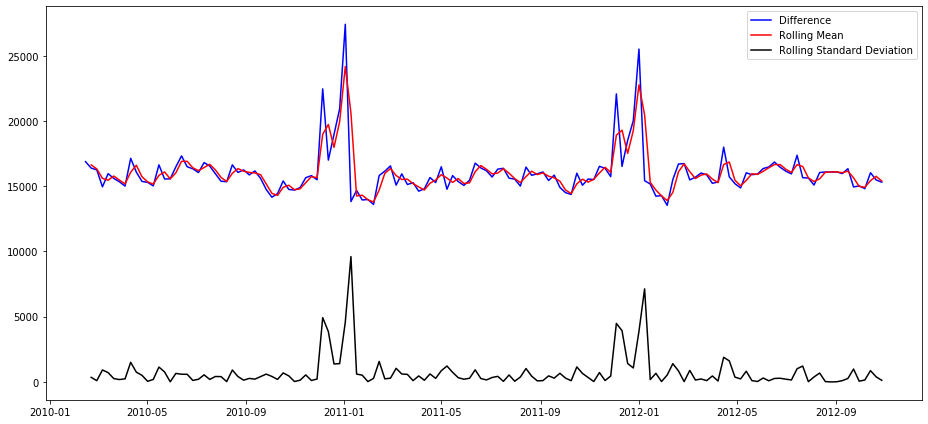

In [79]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_lag, color='blue',label='Difference')
ax.plot(lag_roll_mean, color='red', label='Rolling Mean')
ax.plot(lag_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

## 3.Log

In [30]:
logged_week = np.log1p(df_week['Weekly_Sales']).dropna() #taking log of data

In [31]:
log_roll_mean = logged_week.rolling(window=2, center=False).mean()
log_roll_std = logged_week.rolling(window=2, center=False).std()

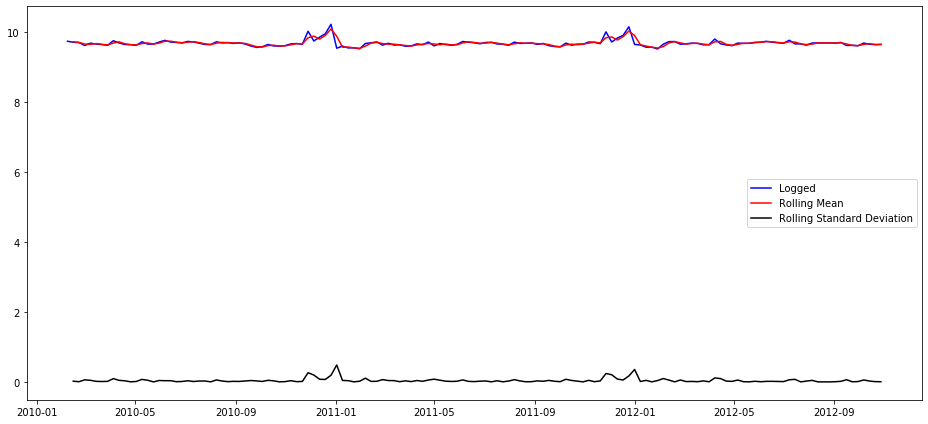

In [32]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(logged_week, color='blue',label='Logged')
ax.plot(log_roll_mean, color='red', label='Rolling Mean')
ax.plot(log_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

# Auto-ARIMA MODEL

I tried my data without any changes, then tried with shifting, taking log and difference version of data. Differenced data gave best results. So, I decided to take difference and use this data. 

### Train-Test Split

In [11]:
train_data_diff = df_week_diff [:int(0.7*(len(df_week_diff )))]
test_data_diff = df_week_diff [int(0.7*(len(df_week_diff ))):]

In [25]:
# train_data = train_data['Weekly_Sales']
# test_data = test_data['Weekly_Sales']

model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_diff)

Fit ARIMA: (0, 0, 0)x(0, 0, 0, 1) (constant=True); AIC=1826.858, BIC=1832.048, Time=0.014 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 1) (constant=True); AIC=1793.619, BIC=1801.404, Time=0.094 seconds
Fit ARIMA: (0, 0, 2)x(0, 0, 0, 1) (constant=True); AIC=1795.532, BIC=1805.912, Time=0.199 seconds
Fit ARIMA: (0, 0, 3)x(0, 0, 0, 1) (constant=True); AIC=1793.997, BIC=1806.973, Time=0.153 seconds
Fit ARIMA: (0, 0, 4)x(0, 0, 0, 1) (constant=True); AIC=1794.022, BIC=1809.593, Time=0.401 seconds
Fit ARIMA: (0, 0, 5)x(0, 0, 0, 1) (constant=True); AIC=1776.663, BIC=1794.828, Time=0.209 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 1) (constant=True); AIC=1804.051, BIC=1811.836, Time=0.020 seconds
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 1) (constant=True); AIC=1792.816, BIC=1803.197, Time=0.137 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 1) (constant=True); AIC=1794.966, BIC=1807.941, Time=0.133 seconds
Fit ARIMA: (1, 0, 3)x(0, 0, 0, 1) (constant=True); AIC=1784.311, BIC=1799.882, Time=0.238 seconds
Fit ARIMA: (1, 0, 4)

ARIMA(maxiter=200, method='lbfgs', order=(0, 0, 5), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 1),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

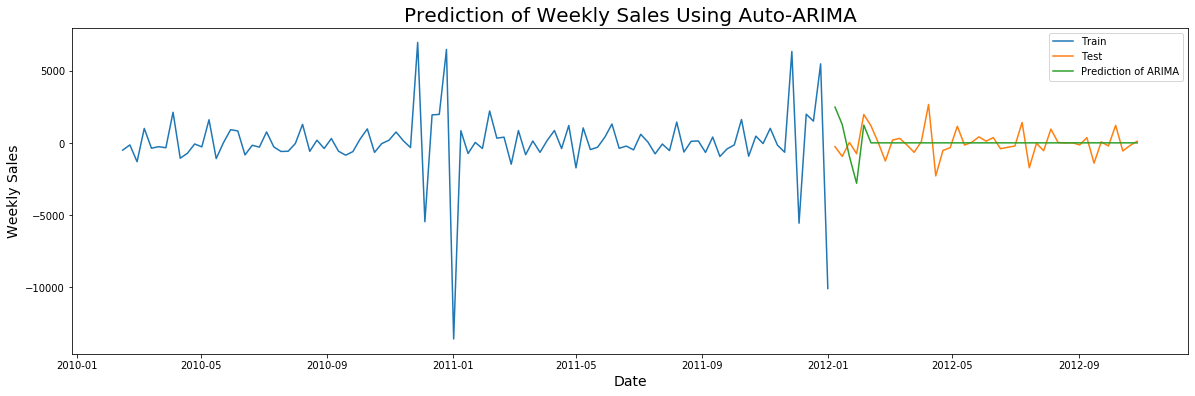

In [27]:
y_pred = model_auto_arima.predict(n_periods=len(test_data_diff))
y_pred = pd.DataFrame(y_pred,index = test_data1.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

I do not like the pattern of predictions so I decided to try another model.

# ExponentialSmoothing

I checked suitable Holt-Winters models according tp my data. Exponential Smooting are used when data has trend, and it flattens the trend. The damped trend method adds a damping parameter so, the trend converges to a constant value in the future. 

My difference data has some minus and zero values, so I used additive seasonal and trend instead of multiplicative. Seasonal periods are chosen from the decomposed graphs above. For tuning the model with iterations take too much time so, I changed and tried model for different parameters and found the best parameters and fitted them to model.

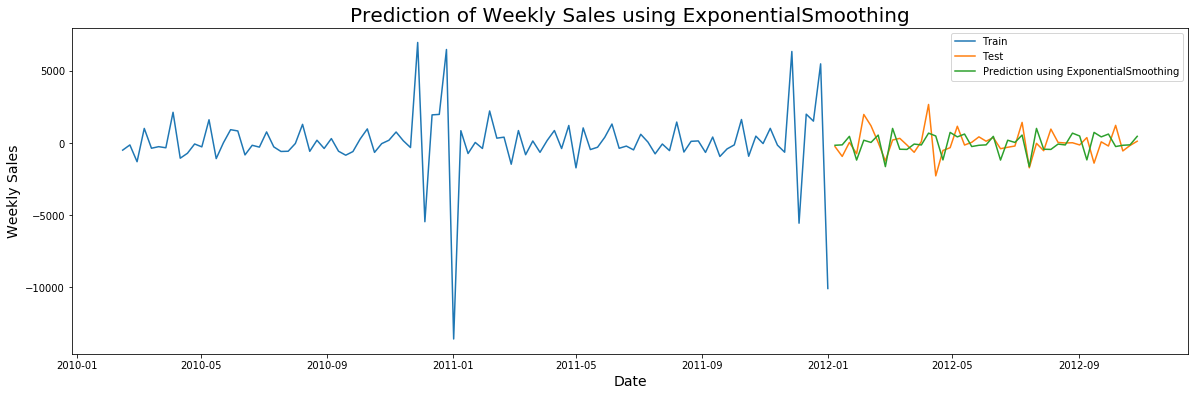

In [35]:
model_holt_winters = ExponentialSmoothing(train_data_diff, seasonal_periods=20, seasonal='additive',
                                           trend='additive',damped=True).fit() #Taking additive trend and seasonality.
y_pred = model_holt_winters.forecast(len(test_data_diff))# Predict the test data

#Visualize train, test and predicted data.
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using ExponentialSmoothing', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction using ExponentialSmoothing')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()


# Metric

Detailed metric explanations can be found in STEP2_RandomForest Notebook.

In [15]:
def wmae_test(test, pred): # WMAE for test
    weights = X_test['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

In [21]:
wmae_test(test_data_diff, y_pred)

821.3280930823155

At the end, I found best results for my data with Exponential Smoothing Model.

# ARCH

I also tried ARCH model with it's different versions like t/ARCH - g/ARCH etc. But, all of them did not give good results, so I did not continue to play with them.

In [45]:
am = arch_model(train_data_diff, vol='GARCH',power=1,o=1)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     38,   Neg. LLF: 875.6700557465974
Iteration:     10,   Func. Count:     75,   Neg. LLF: 874.1915341504223
Iteration:     15,   Func. Count:    110,   Neg. LLF: 872.954198582612
Iteration:     20,   Func. Count:    145,   Neg. LLF: 870.6894488423782
Iteration:     25,   Func. Count:    181,   Neg. LLF: 870.6894049425991
Iteration:     30,   Func. Count:    216,   Neg. LLF: 870.6874334439246
Iteration:     35,   Func. Count:    251,   Neg. LLF: 869.861615153748
Iteration:     40,   Func. Count:    288,   Neg. LLF: 868.6551595550237
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 868.6407966188482
            Iterations: 43
            Function evaluations: 309
            Gradient evaluations: 43
                  Constant Mean - TARCH/ZARCH Model Results                   
Dep. Variable:           Weekly_Sales   R-squared:                      -0.035
Mean Model:             Constant Mean   Adj. R-squared:  

My best result for this project is 821. According to sales amounts this value is roughly around 4-5% error. If we can take our average sales and take percentage of 821 errors, it gives 4-5% roughly. 